# Importing Libraries

In [1]:
!pip install xgboost
!pip install graphviz
!pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm
import pylab 

from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Importing the File

In [3]:
AirBnB = pd.read_csv( r"C:\Users\Jeevisha\Desktop\AirBnB Jeevisha\AB_NYC_2019.csv")
AirBnB.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# Exploratory Data Analysis

## Data Types

In [4]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## Missing Values

In [5]:
def missing_values(x):
        mis_val = x.isnull().sum()
        mis_val_percent = 100 * x.isnull().sum() / len(x)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [6]:
missing_values(AirBnB)

Missing Values  % of Total Values
id                                           0           0.000000
name                                        16           0.032723
host_id                                      0           0.000000
host_name                                   21           0.042949
neighbourhood_group                          0           0.000000
neighbourhood                                0           0.000000
latitude                                     0           0.000000
longitude                                    0           0.000000
room_type                                    0           0.000000
price                                        0           0.000000
minimum_nights                               0           0.000000
number_of_reviews                            0           0.000000
last_review                              10052          20.558339
reviews_per_month                        10052          20.558339
calculated_host_listings_count               0           0.000000
availability_365                             0           0.000000

In [7]:
AirBnB.reviews_per_month.fillna(0,inplace=True)

In [8]:
AirBnB.id.nunique()

48895

In [9]:
AirBnB.shape

(48895, 16)

## Frequency counts of the data

In [10]:
AirBnB.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**Brooklyn and Manhattan are in the most demand , have most of the properties and also are costlier then others.**

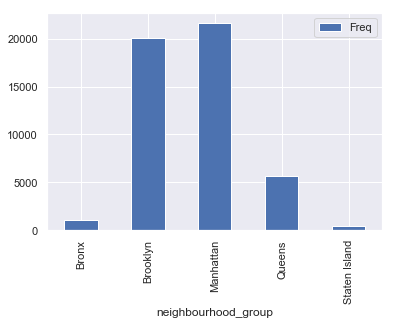

In [11]:
Area=AirBnB.groupby(["neighbourhood_group"]).size().reset_index(name="Freq")
Area.plot.bar(x="neighbourhood_group",y="Freq")

In [12]:
AirBnB.neighbourhood.value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

In [13]:
AirBnB.groupby(["neighbourhood_group"]).mean()

id       host_id   latitude  longitude  \
neighbourhood_group                                                     
Bronx                2.273492e+07  1.056099e+08  40.848305 -73.884552   
Brooklyn             1.825685e+07  5.671526e+07  40.685036 -73.951190   
Manhattan            1.877494e+07  6.783062e+07  40.765062 -73.974607   
Queens               2.175500e+07  9.615680e+07  40.731531 -73.872775   
Staten Island        2.159747e+07  9.853360e+07  40.610225 -74.105805   

                          price  minimum_nights  number_of_reviews  \
neighbourhood_group                                                  
Bronx                 87.496792        4.560953          26.004583   
Brooklyn             124.383207        6.056556          24.202845   
Manhattan            196.875814        8.579151          20.985596   
Queens                99.517649        5.181433          27.700318   
Staten Island        114.812332        4.831099          30.941019   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                         1.475655                        2.233731   
Brooklyn                      1.049790                        2.284371   
Manhattan                     0.976782                       12.791330   
Queens                        1.567076                        4.060184   
Staten Island                 1.576381                        2.319035   

                     availability_365  
neighbourhood_group                    
Bronx                      165.758937  
Brooklyn                   100.232292  
Manhattan                  111.979410  
Queens                     144.451818  
Staten Island              199.678284

In [14]:
AirBnB.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [15]:
Room_type=AirBnB.groupby(["room_type"])

In [16]:
Room_type.first()

id                                 name  host_id  \
room_type                                                              
Entire home/apt   2595                Skylit Midtown Castle     2845   
Private room      2539   Clean & quiet apt home by the park     2787   
Shared room      12048  LowerEastSide apt share shortterm 1     7549   

                host_name neighbourhood_group    neighbourhood  latitude  \
room_type                                                                  
Entire home/apt  Jennifer           Manhattan          Midtown  40.75362   
Private room         John            Brooklyn       Kensington  40.64749   
Shared room           Ben           Manhattan  Lower East Side  40.71401   

                 longitude  price  minimum_nights  number_of_reviews  \
room_type                                                              
Entire home/apt  -73.98377    225               1                 45   
Private room     -73.97237    149               1                  9   
Shared room      -73.98917     40               1                214   

                last_review  reviews_per_month  \
room_type                                        
Entire home/apt  2019-05-21               0.38   
Private room     2018-10-19               0.21   
Shared room      2019-07-05               1.81   

                 calculated_host_listings_count  availability_365  
room_type                                                          
Entire home/apt                               2               355  
Private room                                  6               365  
Shared room                                   4               188

In [17]:
EH_Apt=Room_type.get_group('Entire home/apt')

In [18]:
PR=Room_type.get_group('Private room')

In [19]:
SR=Room_type.get_group('Shared room')

In [20]:
EH_Apt.head()

id                                              name  host_id  \
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group neighbourhood  latitude  longitude  price  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377    225   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976     89   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399     80   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500    200   
9          Ben           Manhattan     Chinatown  40.71344  -73.99037    150   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
1               1                 45  2019-05-21               0.38   
3               1                270  2019-07-05               4.64   
4              10                  9  2018-11-19               0.10   
5               3                 74  2019-06-22               0.59   
9               1                160  2019-06-09               1.33   

   calculated_host_listings_count  availability_365  
1                               2               355  
3                               1               194  
4                               1                 0  
5                               1               129  
9                               4               188

In [21]:
EH_Apt[["price","availability_365","number_of_reviews"]].mean()

price                211.794246
availability_365     111.920304
number_of_reviews     22.842418
dtype: float64

In [22]:
PR[["price","availability_365","number_of_reviews"]].mean()

price                 89.780973
availability_365     111.203933
number_of_reviews     24.112962
dtype: float64

In [23]:
SR[["price","availability_365","number_of_reviews"]].mean()

price                 70.127586
availability_365     162.000862
number_of_reviews     16.600000
dtype: float64

In [24]:
SR["neighbourhood_group"].value_counts()

Manhattan        480
Brooklyn         413
Queens           198
Bronx             60
Staten Island      9
Name: neighbourhood_group, dtype: int64

In [25]:
AirBnB.groupby(["neighbourhood_group","room_type"]).size().reset_index(name="Freq")

neighbourhood_group        room_type   Freq
0                Bronx  Entire home/apt    379
1                Bronx     Private room    652
2                Bronx      Shared room     60
3             Brooklyn  Entire home/apt   9559
4             Brooklyn     Private room  10132
5             Brooklyn      Shared room    413
6            Manhattan  Entire home/apt  13199
7            Manhattan     Private room   7982
8            Manhattan      Shared room    480
9               Queens  Entire home/apt   2096
10              Queens     Private room   3372
11              Queens      Shared room    198
12       Staten Island  Entire home/apt    176
13       Staten Island     Private room    188
14       Staten Island      Shared room      9

In [26]:
AirBnB.groupby(["neighbourhood_group"]).mean().reset_index()

neighbourhood_group            id       host_id   latitude  longitude  \
0               Bronx  2.273492e+07  1.056099e+08  40.848305 -73.884552   
1            Brooklyn  1.825685e+07  5.671526e+07  40.685036 -73.951190   
2           Manhattan  1.877494e+07  6.783062e+07  40.765062 -73.974607   
3              Queens  2.175500e+07  9.615680e+07  40.731531 -73.872775   
4       Staten Island  2.159747e+07  9.853360e+07  40.610225 -74.105805   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
0   87.496792        4.560953          26.004583           1.475655   
1  124.383207        6.056556          24.202845           1.049790   
2  196.875814        8.579151          20.985596           0.976782   
3   99.517649        5.181433          27.700318           1.567076   
4  114.812332        4.831099          30.941019           1.576381   

   calculated_host_listings_count  availability_365  
0                        2.233731        165.758937  
1                        2.284371        100.232292  
2                       12.791330        111.979410  
3                        4.060184        144.451818  
4                        2.319035        199.678284

In [27]:
Unique_host=AirBnB.drop_duplicates(['host_id'])

In [28]:
Unique_host.sort_values(by=["calculated_host_listings_count"], ascending=False).head()

id                                               name    host_id  \
38293  30181691      Sonder | 180 Water | Incredible 2BR + Rooftop  219517861   
26137  20845031  Homey Midtown East 1BR w/ Gym, Doorman, near t...  107434423   
9740    7491713       NYC Lavish Studio Apartment Steps from SoHo!   30283594   
32718  25779464              Lovely Room in the Heart of Manhattan  137358866   
5093    3662724                 5144-Prime Doorman!78ST & Madison    16098958   

            host_name neighbourhood_group       neighbourhood  latitude  \
38293    Sonder (NYC)           Manhattan  Financial District  40.70637   
26137      Blueground           Manhattan            Kips Bay  40.74510   
9740             Kara           Manhattan  Financial District  40.70862   
32718          Kazuya           Manhattan              Harlem  40.81118   
5093   Jeremy & Laura           Manhattan     Upper East Side  40.77448   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
38293  -74.00645  Entire home/apt    302              29                  0   
26137  -73.97915  Entire home/apt    308              30                  0   
9740   -74.01408  Entire home/apt    169              30                  3   
32718  -73.94231     Private room     56              30                  4   
5093   -73.96102  Entire home/apt    175              30                  2   

      last_review  reviews_per_month  calculated_host_listings_count  \
38293         NaN               0.00                             327   
26137         NaN               0.00                             232   
9740   2018-12-07               0.09                             121   
32718  2019-04-06               0.37                             103   
5093   2019-05-30               0.06                              96   

       availability_365  
38293               309  
26137               156  
9740                364  
32718               244  
5093                281

## Looking at correlations between variables

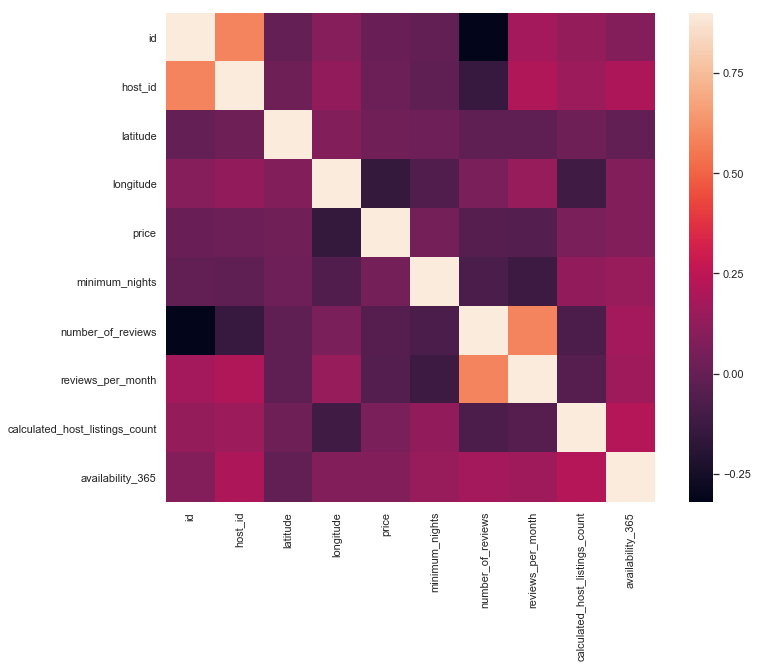

In [29]:
corr_matrix = AirBnB.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

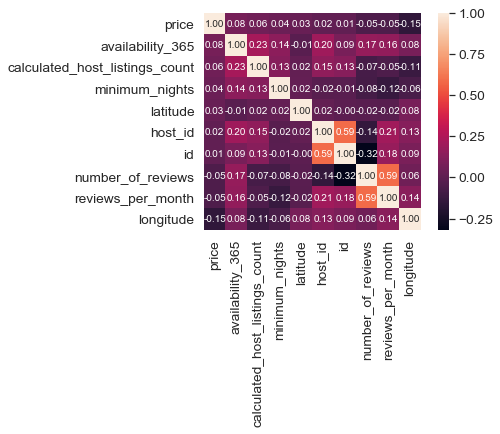

In [30]:
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'price')['price'].index
cm = np.corrcoef(AirBnB[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [31]:
NG=AirBnB.groupby(["neighbourhood_group"])

In [32]:
NG.first()

id                                               name  \
neighbourhood_group                                                             
Bronx                44096                                   Room with a View   
Brooklyn              2539                 Clean & quiet apt home by the park   
Manhattan             2595                              Skylit Midtown Castle   
Queens               12937  1 Stop fr. Manhattan! Private Suite,Landmark B...   
Staten Island        42882                          New York room with a view   

                     host_id             host_name     neighbourhood  \
neighbourhood_group                                                    
Bronx                 190409              Waundell        Highbridge   
Brooklyn                2787                  John        Kensington   
Manhattan               2845              Jennifer           Midtown   
Queens                 50124               Orestes  Long Island City   
Staten Island         185978  Newyorkroomwithaview        St. George   

                     latitude  longitude        room_type  price  \
neighbourhood_group                                                
Bronx                40.83232  -73.93184     Private room     40   
Brooklyn             40.64749  -73.97237     Private room    149   
Manhattan            40.75362  -73.98377  Entire home/apt    225   
Queens               40.74771  -73.94740     Private room    130   
Staten Island        40.64524  -74.08088     Private room     70   

                     minimum_nights  number_of_reviews last_review  \
neighbourhood_group                                                  
Bronx                             1                219  2019-07-04   
Brooklyn                          1                  9  2018-10-19   
Manhattan                         1                 45  2019-05-21   
Queens                            3                248  2019-07-01   
Staten Island                     2                166  2019-06-13   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                             2.04                               3   
Brooklyn                          0.21                               6   
Manhattan                         0.38                               2   
Queens                            2.25                               1   
Staten Island                     1.66                               1   

                     availability_365  
neighbourhood_group                    
Bronx                             353  
Brooklyn                          365  
Manhattan                         355  
Queens                            215  
Staten Island                     312

In [33]:
Bronx=NG.get_group('Bronx')

In [34]:
Bronx.head()

id                                              name  host_id  \
171  44096                                  Room with a View   190409   
207  54626                    Cozy bedroom by Yankee Stadium   190409   
260  63588                                               LL3   295128   
261  63610  DOMINIQUE'S NY mini efficiency* wifi*metro*quiet   310670   
309  71812              Condo Apartment with laundry in unit   369015   

        host_name neighbourhood  latitude  longitude        room_type  price  \
171      Waundell    Highbridge  40.83232  -73.93184     Private room     40   
207      Waundell    Highbridge  40.83075  -73.93058     Private room     45   
260  Carol Gloria  Clason Point  40.81309  -73.85514     Private room     90   
261           Vie   Eastchester  40.88057  -73.83572  Entire home/apt    105   
309          Thai   Kingsbridge  40.87207  -73.90193  Entire home/apt     90   

     minimum_nights  number_of_reviews last_review  reviews_per_month  \
171               1                219  2019-07-04               2.04   
207               1                138  2019-06-30               1.45   
260               2                  0         NaN               0.00   
261               2                 38  2019-06-27               0.50   
309              30                  4  2019-01-02               0.35   

     calculated_host_listings_count  availability_365  
171                               3               353  
207                               3               323  
260                               7               349  
261                              13               365  
309                               2               346

In [35]:
Bronx.groupby(["neighbourhood","room_type"]).mean()

id       host_id   latitude  \
neighbourhood      room_type                                                
Allerton           Entire home/apt  2.177165e+07  9.900126e+07  40.865760   
                   Private room     1.903460e+07  1.090219e+08  40.865003   
Baychester         Entire home/apt  2.089410e+07  1.203282e+08  40.871170   
                   Private room     2.310184e+07  1.532322e+08  40.875450   
Belmont            Entire home/apt  2.776553e+07  1.618895e+08  40.853237   
                   Private room     2.676631e+07  1.450575e+08  40.855167   
                   Shared room      2.690971e+07  1.417421e+08  40.856795   
Bronxdale          Entire home/apt  2.211204e+07  1.187086e+08  40.854211   
                   Private room     2.037473e+07  1.098297e+08  40.855020   
                   Shared room      3.554630e+07  5.206234e+07  40.856000   
Castle Hill        Entire home/apt  2.891853e+07  1.662488e+08  40.817782   
                   Private room     3.635074e+07  2.733542e+08  40.816174   
City Island        Entire home/apt  2.076459e+07  5.320218e+07  40.849722   
                   Private room     2.569998e+07  5.816778e+07  40.844966   
Claremont Village  Entire home/apt  2.304275e+07  3.842943e+07  40.838081   
                   Private room     2.942234e+07  1.372092e+08  40.839627   
Clason Point       Entire home/apt  1.814093e+07  6.753142e+07  40.811123   
                   Private room     2.212993e+07  5.354170e+07  40.811532   
                   Shared room      1.447449e+07  1.362117e+07  40.815465   
Co-op City         Private room     2.213346e+06  6.335556e+06  40.864815   
Concourse          Entire home/apt  1.791691e+07  6.649338e+07  40.823278   
                   Private room     2.040559e+07  1.117188e+08  40.829346   
Concourse Village  Entire home/apt  1.225683e+07  5.755289e+07  40.829403   
                   Private room     2.276135e+07  1.199202e+08  40.830117   
                   Shared room      2.069553e+07  1.481212e+08  40.832315   
East Morrisania    Entire home/apt  2.242424e+07  1.545535e+08  40.830613   
                   Private room     2.543384e+07  1.727820e+08  40.831536   
Eastchester        Entire home/apt  9.822143e+06  3.106700e+05  40.880613   
                   Private room     1.781824e+07  3.547919e+07  40.880882   
                   Shared room      7.791636e+06  3.106700e+05  40.882110   
...                                          ...           ...        ...   
Schuylerville      Shared room      1.747511e+07  8.610883e+07  40.840340   
Soundview          Entire home/apt  2.450371e+07  1.698896e+08  40.827868   
                   Private room     2.030590e+07  7.934461e+07  40.826447   
Spuyten Duyvil     Entire home/apt  1.185092e+07  2.179943e+07  40.881217   
                   Private room     2.987645e+07  1.248674e+08  40.880710   
Throgs Neck        Entire home/apt  2.489340e+07  1.385220e+08  40.821345   
                   Private room     2.980570e+07  1.520507e+08  40.826535   
Tremont            Entire home/apt  2.058028e+07  1.327839e+08  40.843677   
                   Private room     1.115583e+07  5.543144e+07  40.842705   
                   Shared room      3.284306e+07  2.297107e+08  40.846605   
Unionport          Entire home/apt  2.817071e+07  1.659637e+08  40.828250   
                   Private room     3.061338e+07  1.491506e+08  40.828353   
University Heights Entire home/apt  2.083810e+07  1.148928e+08  40.860090   
                   Private room     1.716430e+07  8.220892e+07  40.857559   
                   Shared room      3.212038e+07  1.435096e+08  40.855380   
Van Nest           Entire home/apt  2.329452e+07  1.644980e+08  40.843996   
                   Private room     2.384368e+07  9.592482e+07  40.844450   
                   Shared room      3.100944e+07  1.532337e+06  40.840843   
Wakefield          Entire home/apt  2.495086e+07  1.229014e+08  40.894902   
                   Private room     2.6124

In [36]:
Bronx[(Bronx["neighbourhood"]=="Belmont") & (Bronx["room_type"]=="Entire home/apt")]

id                                               name    host_id  \
26290  20960110  Arthur Ave 2BDR sleeps 6! (15 mins from Manhat...   98416305   
39810  30948241     Book NOW this New 3br Home with lots of space.  193626078   
40489  31388229  Book TODAY! Large 3br with lots of space in th...  193626078   

      host_name neighbourhood  latitude  longitude        room_type  price  \
26290     Nihad       Belmont  40.85362  -73.88960  Entire home/apt    140   
39810      Andy       Belmont  40.85222  -73.89277  Entire home/apt    299   
40489      Andy       Belmont  40.85387  -73.89384  Entire home/apt    247   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
26290               2                 71  2019-06-23               3.45   
39810               1                 10  2019-06-28               1.52   
40489               2                 15  2019-06-30               3.17   

       calculated_host_listings_count  availability_365  
26290                               1               291  
39810                               3               322  
40489                               3               322

In [37]:
from scipy.stats import spearmanr
corr, _ = spearmanr(AirBnB['price'], AirBnB['availability_365'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.086


In [38]:
from scipy.stats import kendalltau
coef, p= spearmanr(AirBnB['price'], AirBnB['availability_365'])
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.086
Samples are correlated (reject H0) p=0.000


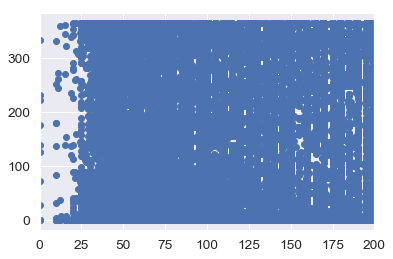

In [39]:
plt.xlim([0, 200])
plt.scatter(AirBnB['price'],AirBnB['availability_365'])

**Preparing the data to build a regression model. Response variable is price.**

In [40]:
AirBnB_MD=AirBnB[["price","number_of_reviews","neighbourhood_group","room_type","availability_365","calculated_host_listings_count","minimum_nights"]]

In [41]:
AirBnB_MD.head()

price  number_of_reviews neighbourhood_group        room_type  \
0    149                  9            Brooklyn     Private room   
1    225                 45           Manhattan  Entire home/apt   
2    150                  0           Manhattan     Private room   
3     89                270            Brooklyn  Entire home/apt   
4     80                  9           Manhattan  Entire home/apt   

   availability_365  calculated_host_listings_count  minimum_nights  
0               365                               6               1  
1               355                               2               1  
2               365                               1               3  
3               194                               1               1  
4                 0                               1              10

In [42]:
pred=AirBnB_MD[["price"]]

In [43]:
pred.head()

price
0    149
1    225
2    150
3     89
4     80

In [44]:
AirBnB_MD.columns

Index(['price', 'number_of_reviews', 'neighbourhood_group', 'room_type',
       'availability_365', 'calculated_host_listings_count', 'minimum_nights'],
      dtype='object')

In [45]:
AirBnB_MD.head()

price  number_of_reviews neighbourhood_group        room_type  \
0    149                  9            Brooklyn     Private room   
1    225                 45           Manhattan  Entire home/apt   
2    150                  0           Manhattan     Private room   
3     89                270            Brooklyn  Entire home/apt   
4     80                  9           Manhattan  Entire home/apt   

   availability_365  calculated_host_listings_count  minimum_nights  
0               365                               6               1  
1               355                               2               1  
2               365                               1               3  
3               194                               1               1  
4                 0                               1              10

In [46]:
AirBnB_MD = pd.get_dummies(AirBnB_MD, columns=['neighbourhood_group','room_type'])

In [47]:
#without log transformation
AirBnB_y = AirBnB_MD.iloc[:, 0]

In [48]:
AirBnB_x=AirBnB_MD.iloc[:,1:]

In [49]:
AirBnB_x.head()

number_of_reviews  availability_365  calculated_host_listings_count  \
0                  9               365                               6   
1                 45               355                               2   
2                  0               365                               1   
3                270               194                               1   
4                  9                 0                               1   

   minimum_nights  neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0               1                          0                             1   
1               1                          0                             0   
2               3                          0                             0   
3               1                          0                             1   
4              10                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          0   
3                                  0                          1   
4                                  0                          1   

   room_type_Private room  room_type_Shared room  
0                       1                      0  
1                       0                      0  
2                       1                      0  
3                       0                      0  
4                       0                      0

In [50]:
AirBnB_y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [51]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

In [52]:
xTrain.shape

(39116, 12)

In [53]:
xTest.shape

(9779, 12)

In [54]:
yTrain[yTrain['price']<200].shape

(31305, 1)

**Outliers in the response variable**

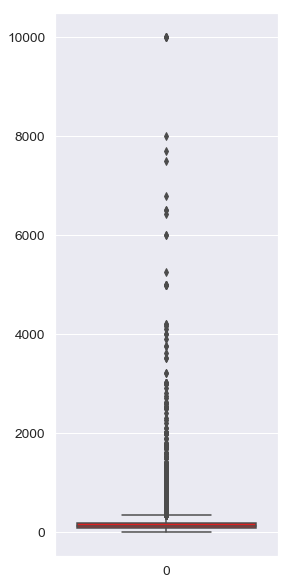

In [55]:
plt.figure(figsize=(4,10))
sns.boxplot(
    data=yTrain['price'],
    color='red')

Text(0.5, 1.0, 'Distribution of Price')

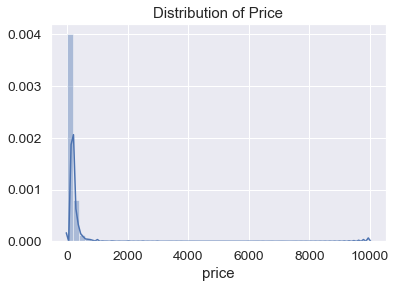

In [56]:
sns.distplot(pred['price']).set_title("Distribution of Price")

In [57]:
from scipy.stats import anderson 
p=anderson((pred['price']))

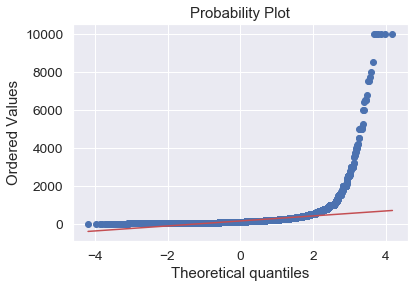

In [58]:
import scipy.stats as stats
fig = plt.figure()
res = stats.probplot((pred['price']), plot=plt)

**Response variable is extremely right skewed : Will do log transformation to deal with the same** 

In [59]:
from scipy.stats import norm


 mean = 4.74 and std dev = 0.70



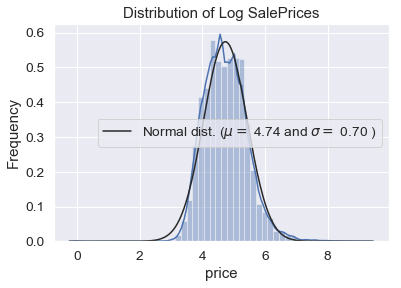

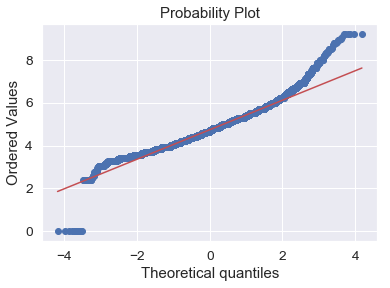

In [60]:
#Using the log1p function applies log(1+x) to all elements of the column
pred['price'] = np.log1p(pred['price'])

#Check the new distribution after log transformation 
sns.distplot(pred['price'], fit=norm) 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pred['price'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(pred['price'], plot=plt)
plt.show()

In [61]:
pred.head()

price
0  5.010635
1  5.420535
2  5.017280
3  4.499810
4  4.394449

**Using XGBoost** 

In [62]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [63]:
data_dmatrix = xgb.DMatrix(data=AirBnB_x,label=pred)

In [64]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

**<u>Hyperparameters</u>**:                        
* **Objective:** It determines the loss function to be used. In this case it is regression
* **Learning_rate:** Step size shrinkage used to prevent overfitting. Range is [0,1]
* **Max_depth:** Depth of the tree 
* **Random_state:** Provided seed to get the same result everytime

In [65]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.2,
                max_depth = 4,random_state=123)

In [66]:
xg_reg.fit(xTrain,yTrain)

[13:00:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [67]:
preds = xg_reg.predict(xTest)
preds_exp = pd.DataFrame(np.exp(preds))

yTest_exp = pd.DataFrame(np.exp(yTest))

In [68]:
rmse = np.sqrt(mean_squared_error(yTest, preds))
print("RMSE: %f" % (rmse))

rmse_exp = np.sqrt(mean_squared_error(yTest_exp, preds_exp))
print("RMSE: %f" % (rmse_exp))

RMSE: 0.480414
RMSE: 234.362119


**Since, the RMSE is too large we cannot use this model.**

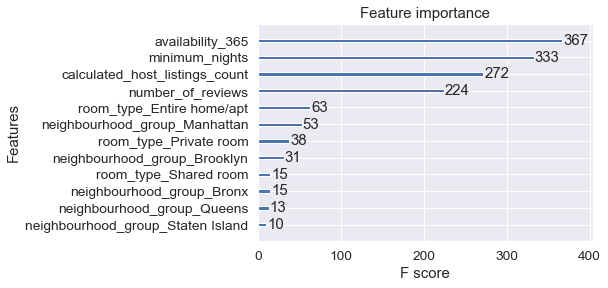

In [69]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Visualizations

In [70]:
import folium
from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[40.7128 ,-74.0060],
                    zoom_start = 10) 

# Ensure you're handing it floats
AirBnB['latitude'] = AirBnB['latitude'].astype(float)
AirBnB['longitude'] = AirBnB['longitude'].astype(float)


heat_df = AirBnB[['latitude', 'longitude']]

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray


In [71]:
def generateBaseMap(default_location=[40.7128 ,-74.0060], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

from folium.plugins import HeatMap
AirBnB['count'] = 1
base_map = generateBaseMap()
HeatMap(data=AirBnB[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map

# Checking distributions of the variables

In [72]:
AirBnB[AirBnB['minimum_nights']>100]

id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
245       61509                Quiet, clean midtown apt w. elevato      23619   
667      253332      Spacious, modern loft in awesome neighborhood     552343   
700      258690                CHELSEA 1 Bdrm Plus Sleeping Loft!!    1359611   
719      263502                  Prime Williamsburg 1/BD New Condo    1382749   
754      271694                Easy, comfortable studio in Midtown    1387370   
757      272026  1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.    1423613   
769      276216                 Nights in White Satin in the Slope    1440691   
970      387324     Cozy Room in Sunny Apartment (Long/Short Term)    1828506   
1038     432090                          Only 5 Min. to Manhattan!    2148881   
1051     437352              Fantastic 2BR in Brooklyn's Best Area     290662   
1054     439750             Perfect apt. above L train Graham stop    1566042   
1305     568684                800sqft apartment with huge terrace    2798644   
1449     649561                 Manhattan Sky Crib (1 year sublet)    3260084   
1615     734749                QUIET spacious 1BR, great location!    3831783   
1757     794425                               Brooklyn two bedroom    4185135   
1758     794427                     Prospect Park Modern 3 Bedroom    4185135   
1863     826764                       Spacious Sunny Union Sq Room    4336760   
2023     895368                   Large 2 bedroom apt in Manhattan    4770121   
2121     973653                     A true Sanctuary in Harlem NYC    4770121   
2139     985338   Monthly rental of guest room,limited kitchen use    1417489   
2150     992977                       Park Slope Pre-War Apartment    4000059   
2214    1039435                Lovely studio in Manhattan,New York    5709288   
2576    1336230                Safe,Sunny,SouthFacing Apt Near All    7245581   
2624    1377320                 Classic and Comfortable UWS PreWar    7461332   
2739    1478946                Prime Chelsea Location,Washer/Dryer    7245581   
2741    1479283   Great Chelsea Location, Couch/2nd bed, Free WiFi    7245581   
2831    1586935                   Luxury Gramercy Lg 1Bd w Balcony    8457613   
2847    1606312                   Williamsburg 2BR 2BA Hotel Condo    3130819   
2854    1615764                                                NaN    6676776   
...         ...                                                ...        ...   
38767  30393342  Neat FiDi Studio w/ Gym, Doorman, + Roof deck ...  107434423   
39044  30499109   NYC Christmas spirt entire apartment in Brooklyn    1513294   
39443  30737643       Long Term Stay 4 1/2- 5 months. Starting Jan    1466422   
39721  30912673                             Williamsburg Penthouse   50760546   
39875  30981877                                  The NYC Adventure  231474021   
40660  31540929        Classic 3 Bedroom Upper West Side Apartment   28035940   
40710  31590566          PRIME SOHO: Perfect Room on Prince Street  236445157   
40732  31605060     BIG ROOM on Prince Street, PRIME SOHO LOCATION  236445157   
40875  31773898   PRIME SOHO: Lovely Room With Closet on Prince St  236445157   
40933  31835917                                      Chic and cozy   26317294   
41156  32013622                Room for rent from March to August.    1767221   
41526  32285578                            Spacious NYC experience  242330603   
41661  32397072         WILLIAMSBURG PRIME LOCATION-AMAZING LIGHT!  201791531   
41711  32428466  Top floor apt in luxury building - lease takeover   39427266   
41948  32607488                      2nd Floor, Room # 2 (12'x14')  244817841   
42177  32742923      West Village/Chelsea 3 bd For Long Term Stays  221901576   
42412  32917116  Luxurious townhouse, 2bd w/Loft+2bath+High-cei...  129412544   
42795  33226326       Manhattan luxury build

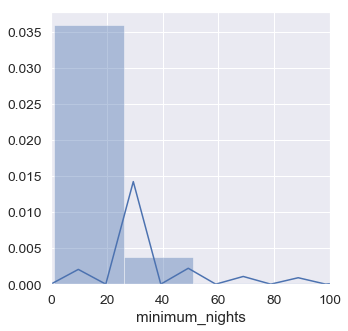

In [73]:
plt.xlim([0, 100])
sns.distplot(AirBnB['minimum_nights'])

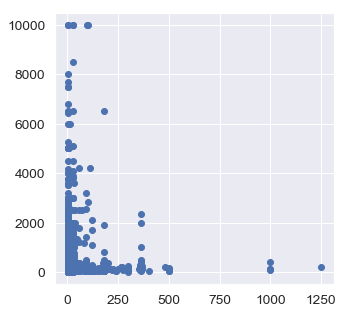

In [74]:
plt.scatter(AirBnB['minimum_nights'],AirBnB['price'])

Outliers have to be treated otherwise decision boundries will be created 

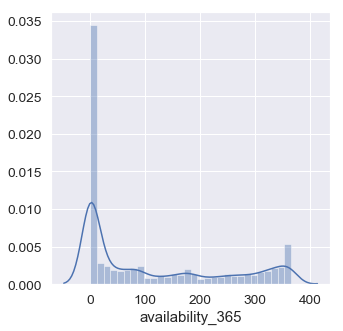

In [75]:
sns.distplot(AirBnB['availability_365'])

In [76]:
AirBnB['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

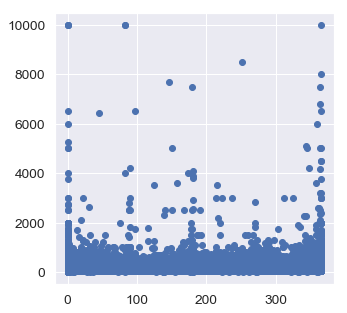

In [77]:
plt.scatter(AirBnB['availability_365'],AirBnB['price'])

In [78]:
AirBnB[AirBnB['price']>9999]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
9151                0.04                               1                 0   
17692               0.16                               1                 0   
29238               0.00                               1                83   

       count  
9151       1  
17692      1  
29238      1

In [79]:
AirBnB[(AirBnB['neighbourhood_group']=='Queens') & (AirBnB['neighbourhood']=='Astoria') & (AirBnB['room_type']=='Private room')]

id                                               name    host_id  \
348       94035  Modern, Safe, Clean, Bright Room in Astoria for 2      35375   
776      278145                 Large Room in a Huge NY apartment.    1452026   
1242     531091               King size bedroom in 2 bed apartment    1787284   
1329     582372                Comfy New York City Launching Pad!!     733370   
1438     645693   ☆☆New Discount☆☆ Beautiful Room / Next to Subway    3233986   
1502     679769        Great Room in Astoria! Close to Everything!    3404680   
1677     761835                    Apto 2 bed $80 night per person    4015459   
1692     766964          Sublet Lovely Room in Astoria, 3-4 months    4044889   
2022     894093  Cozy room,only 2 blocks from subway,10min to C...    4644172   
2131     978615                NICE ROOM IN ASTORIA NEAR MANHATTAN    5369117   
2141     987329                   ROOM NEAR TIMES SQUARE MANHATTAN    5369117   
2161     998423                Great space minutes from Manhattan!    2765234   
2210    1036498                ☆☆New Discount☆☆ 10min to Manhattan    3233986   
2264    1077375                Private RM 15min from the Manhattan    5855145   
2677    1428371                  Great  Room in Astoria - New York    7681692   
2838    1598012                         Close to the city, Astoria    3360223   
2853    1614964                         Charming Room in Astoria!!    8783166   
2919    1682958                   Beautiful Cozy Room Great Price!    6194487   
2923    1687108                  Private, Clean and Comfortable NY     177712   
2944    1702781                                     Nice and quiet    7614595   
2977    1733157  Private Family Home 2BR mins to Midtown Manhattan    9131167   
2990    1743116                               Cozy Room in Astoria    8783166   
3015    1763209  10mins to Manhattan, 59th St, 17mins Times Squ...    9268156   
3207    1914590                Nice clean large Bedroom in Astoria    6194487   
3441    2065101                                         Sunny Room    7455886   
3570    2134294                  Nice room in Astoria, Queens, NYC   10859726   
3860    2346416             Lovely private room close to Manhattan   11983859   
3954    2461540                  Big BR 15 min away from Manhattan   12587147   
4003    2513351                 Bright and Open Astoria Apartment!   12864943   
4006    2515876      Comfortable, spacious “ 1 bedroom “ apartment   12878653   
...         ...                                                ...        ...   
45048  34504997   Clean room, 10 min away from the city. PRKG AVBL  252646618   
45055  34509302  Perfect room for road warrior 20mins to Manhattan    7832790   
45216  34605049  Furnished room for girl in Astoria-15mins to city  194571019   
45348  34686718                    Clean and Sunny room in Astoria  248555214   
45363  34704536               Large Family Room/ parking available  252646618   
45522  34810052          Cozy & clean place - 15min from Manhattan  262394284   
46088  35066396  Center of Hipster Astoria 4bd 2bath 2blocks Su...  263694567   
46405  35233704                        Roberta's New York Paradise  265277264   
46471  35265786                   Cozy bedroom in Long Island City  265506523   
46503  35281795                                         Cute place   81295676   
46875  35467615                                I LOVE NYC STUDIO .  241985816   
46905  35484662             Cozy bedroom in Astoria next to subway  243367528   
46972  35518708                              EMPIRE STATE BUILDING  241985816   
47014  35545082     Subway 1 min , Manhattan 10 min. Modern & Cozy  253571094   
47187  35617875                                 The New York House  125170095   
47281  35672836                                   Times Square NYC  241985816   
47380  35710965    Charming Authentic NYC Home 12 min to Manhattan   10061222   
47466  35745881            Large room in a c

# Random Forest Regression

In [116]:
AirBnB_MD=AirBnB[["price","number_of_reviews","neighbourhood_group","room_type","availability_365","calculated_host_listings_count","minimum_nights", 'latitude',
       'longitude']]

In [117]:
AirBnB_MD.price.describe(percentiles=[.25,.5,.75,.8,.85,.9,.95,.99])

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
80%        200.000000
85%        225.000000
90%        269.000000
95%        355.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64

In [118]:
AirBnB_MD[AirBnB_MD['price']>1000].shape

(239, 9)

In [119]:
AirBnB_MD[AirBnB_MD['price']<10].shape

(11, 9)

In [120]:
AirBnB_MD.shape

(48895, 9)

In [121]:
AirBnB_1000=AirBnB_MD[(AirBnB_MD['price']<1001) & (AirBnB_MD['price']>9 )]

**Removing extreme values as we do not have enough data to explain the high variance (only 239 observations from 1k-10k price and also the numbe of variables are less) . We now define our problem to predict the prices for AirBnB which fall in the above range.**

In [124]:
AirBnB_1000.price.min()

10

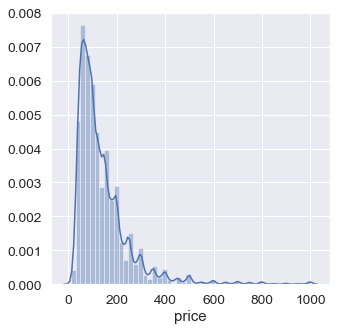

In [125]:
sns.distplot(AirBnB_1000['price'])

In [127]:
pred = AirBnB_1000[['price']]


 mean = 4.72 and std dev = 0.66



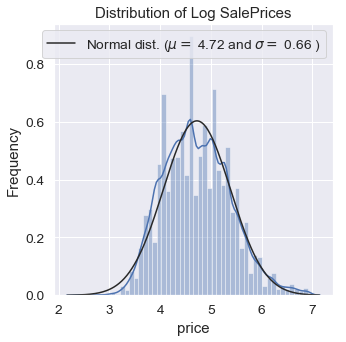

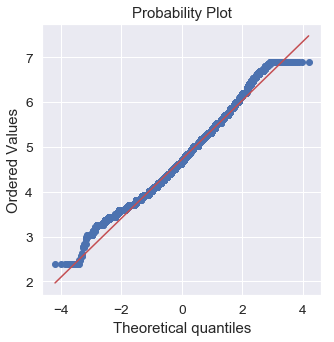

In [128]:
from scipy.stats import norm
import scipy.stats as stats
#Using the log1p function applies log(1+x) to all elements of the column
pred['price'] = np.log1p(pred['price'])

#Check the new distribution after log transformation 
sns.distplot(pred['price'], fit=norm) 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pred['price'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(pred['price'], plot=plt)
plt.show()

In [129]:
AirBnB_1000.price.describe(percentiles=[.25,.5,.75,.8,.85,.9,.95,.99])

count    48645.000000
mean       141.311789
std        116.731330
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
80%        199.000000
85%        225.000000
90%        259.000000
95%        350.000000
99%        650.000000
max       1000.000000
Name: price, dtype: float64

In [130]:
AirBnB_1000[['price']].describe()

price
count  48645.000000
mean     141.311789
std      116.731330
min       10.000000
25%       69.000000
50%      105.000000
75%      175.000000
max     1000.000000

In [132]:
AirBnB_x=AirBnB_1000.iloc[:,1:]

In [133]:
AirBnB_x.columns

Index(['number_of_reviews', 'neighbourhood_group', 'room_type',
       'availability_365', 'calculated_host_listings_count', 'minimum_nights',
       'latitude', 'longitude'],
      dtype='object')

In [134]:
AirBnB_x=pd.get_dummies(AirBnB_x, columns=['neighbourhood_group','room_type'])

In [135]:
AirBnB_x=AirBnB_x.astype('float')

In [136]:
AirBnB_x.head()

number_of_reviews  availability_365  calculated_host_listings_count  \
0                9.0             365.0                             6.0   
1               45.0             355.0                             2.0   
2                0.0             365.0                             1.0   
3              270.0             194.0                             1.0   
4                9.0               0.0                             1.0   

   minimum_nights  latitude  longitude  neighbourhood_group_Bronx  \
0             1.0  40.64749  -73.97237                        0.0   
1             1.0  40.75362  -73.98377                        0.0   
2             3.0  40.80902  -73.94190                        0.0   
3             1.0  40.68514  -73.95976                        0.0   
4            10.0  40.79851  -73.94399                        0.0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            1.0   
3                           1.0                            0.0   
4                           0.0                            1.0   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                        0.0                     1.0                    0.0  
1                        1.0                     0.0                    0.0  
2                        0.0                     1.0                    0.0  
3                        1.0                     0.0                    0.0  
4                        1.0                     0.0                    0.0

In [137]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

In [138]:
AirBnB_1000.isnull().sum()

price                             0
number_of_reviews                 0
neighbourhood_group               0
room_type                         0
availability_365                  0
calculated_host_listings_count    0
minimum_nights                    0
latitude                          0
longitude                         0
dtype: int64

In [139]:
# create regressor object 
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 123) 
  
# fit the regressor with x and y data 
regressor_rf.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [140]:
pred_rf = regressor_rf.predict(xTest)
pred_rf_num = pd.DataFrame(np.exp(pred_rf))

yTest_num = pd.DataFrame(np.exp(yTest))

rmse = np.sqrt(mean_squared_error(yTest, pred_rf))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
print("RMSE: %f" % (rmse))

RMSE: 0.405130
RMSE: 86.732867


**Further removing extreme values restricting the range between 9 to 780, to improve the distribution. We now define our problem to predict the prices for AirBnB which fall in the above range.**

In [188]:
AirBnB_780=AirBnB_MD[(AirBnB_MD['price']<781) & (AirBnB_MD['price']>9 )]

In [189]:
AirBnB_780.shape

(48380, 9)

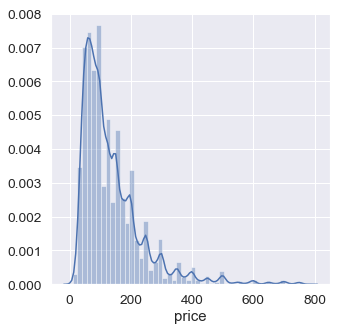

In [190]:
sns.distplot(AirBnB_780['price'])

In [191]:
pred=AirBnB_780[['price']]

In [192]:
AirBnB_780[['price']].describe()

price
count  48380.000000
mean     137.166784
std      102.507758
min       10.000000
25%       69.000000
50%      105.000000
75%      175.000000
max      780.000000


 mean = 4.71 and std dev = 0.65



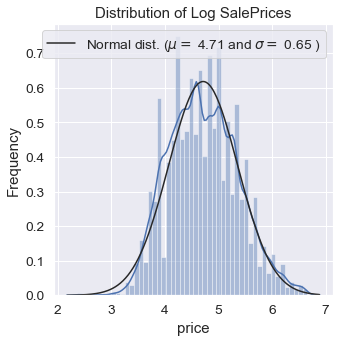

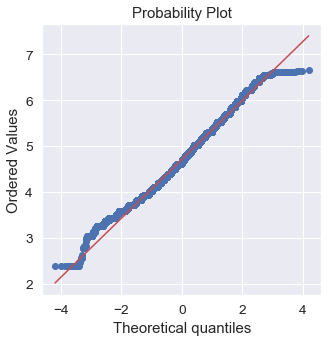

In [201]:
from scipy.stats import norm
import scipy.stats as stats
#Using the log1p function applies log(1+x) to all elements of the column
pred['price'] = np.log1p(pred['price'])

#Check the new distribution after log transformation 
sns.distplot(pred['price'], fit=norm) 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pred['price'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(pred['price'], plot=plt)
plt.show()

In [203]:
AirBnB_x = AirBnB_780.iloc[:,1:]

In [204]:
AirBnB_x = pd.get_dummies(AirBnB_x, columns=['neighbourhood_group','room_type'])

In [205]:
AirBnB_x = AirBnB_x.astype('float')

In [206]:
xTrain, xTest, yTrain, yTest = train_test_split(AirBnB_x, pred, test_size = 0.2, random_state = 123)

In [207]:
# create regressor object 
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 123) 
  
# fit the regressor with x and y data 
regressor_rf.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [208]:
pred_rf_num.describe()

0
count  9.676000e+03
mean            inf
std             NaN
min    9.437906e+09
25%    6.006290e+32
50%    1.473277e+54
75%    1.744103e+82
max             inf

In [209]:
pred_rf = regressor_rf.predict(xTest)
pred_rf_num = pd.DataFrame(np.exp(pred_rf))

yTest_num = pd.DataFrame(np.exp(yTest))

rmse = np.sqrt(mean_squared_error(yTest, pred_rf))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
print("RMSE: %f" % (rmse))

RMSE: 0.391817
RMSE: 74.045338


## Manually looking at ranges of values for different hyperparameters

### n_estimators: the number of trees in the forest (the more the better since we are taking the mean values)

In [210]:
n_estimators = [50, 100, 200, 300, 400, 500]
test_results = []

for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators = estimator, n_jobs = -1) 
   rf.fit(xTrain, yTrain) 
    
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(estimator)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

50
RMSE: 74.494716
100
RMSE: 74.368342
200
RMSE: 74.214879
300
RMSE: 74.072806
400
RMSE: 74.068824
500
RMSE: 74.088737


## max_depths: the maximum depth of a tree(should be an optimum number-not too short and not too large to avoid overfitting)

In [211]:
max_depths = np.linspace(3, 10, 8, endpoint=True)

test_results = []


for max_depth in max_depths:
   rf = RandomForestRegressor(max_depth = max_depth, n_jobs = -1) 
   rf.fit(xTrain, yTrain)
     
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(max_depth)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

3.0
RMSE: 85.838590
4.0
RMSE: 84.212310
5.0
RMSE: 82.669099
6.0
RMSE: 80.902650
7.0
RMSE: 78.917589
8.0
RMSE: 77.737255
9.0
RMSE: 77.106540
10.0
RMSE: 76.124541


## minimum number of samples required to split (fraction of total samples required)

In [212]:
min_samples_splits = np.linspace(0.1, 0.6, 6, endpoint=True)

test_results = []
for min_samples_split in min_samples_splits:
    
   rf = RandomForestRegressor(min_samples_split = min_samples_split, n_jobs = -1) 
   rf.fit(xTrain, yTrain)
      
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(min_samples_split)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

0.1
RMSE: 84.986253
0.2
RMSE: 87.938891
0.30000000000000004
RMSE: 87.991160
0.4
RMSE: 91.613316
0.5
RMSE: 91.597165
0.6
RMSE: 91.619776


## minimum number of samples required to be at a leaf node (fraction of total samples required at the last node for the node to exist)

In [213]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

test_results = []
for min_samples_leaf in min_samples_leafs:
    
   rf = RandomForestRegressor(min_samples_leaf = min_samples_leaf, n_jobs = -1) 
   rf.fit(xTrain, yTrain)
      
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(min_samples_leaf)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

0.1
RMSE: 88.048605
0.2
RMSE: 91.615863
0.30000000000000004
RMSE: 91.583216
0.4
RMSE: 108.328398
0.5
RMSE: 108.318850


## the number of features to consider when looking for a split- default is all features

In [214]:
max_features = list(range(1,AirBnB_780.shape[1]))

test_results = []
for max_feature in max_features:
    
   rf = RandomForestRegressor(max_features = max_feature) 
   rf.fit(xTrain, yTrain)
      
   pred_rf_num = pd.DataFrame(np.exp(rf.predict(xTest)))
   yTest_num = pd.DataFrame(np.exp(yTest))

   rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
   print(max_feature)
   print("RMSE: %f" % (rmse))

   test_results.append(rmse)

1
RMSE: 77.424624
2
RMSE: 76.939899
3
RMSE: 76.439150
4
RMSE: 76.116384
5
RMSE: 76.271076
6
RMSE: 76.351726
7
RMSE: 76.126276
8
RMSE: 76.399146


In [215]:
# Perform Grid-Search

param_grid={
   'max_depth': range(3,8),
   'n_estimators': ( 50, 100, 200, 400, 500),
   'min_samples_split': np.linspace(0.3, 0.6, 4, endpoint=True),
   'min_samples_leaf' : np.linspace(0.1, 0.3, 3, endpoint=True),
   'max_features' : list(range(1, AirBnB_780.shape[1]))
            }

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
print(grid_search.best_params_)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 48.0min finished


{'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 0.1, 'min_samples_split': 0.3, 'n_estimators': 100}


In [216]:
best_grid = grid_search.best_estimator_

In [217]:
# create regressor object 
#grid_regressor_rf = RandomForestRegressor(max_depth= 7, max_features= 8, min_samples_leaf= 0.1, min_samples_split= 0.3, 
 #                                    n_estimators= 50) 
  
# fit the regressor with x and y data 
#grid_regressor_rf.fit(xTrain,yTrain)  

pred_rf = grid_search.predict(xTest)
pred_rf_num = pd.DataFrame(np.exp(pred_rf))

yTest_num = pd.DataFrame(np.exp(yTest))

rmse = np.sqrt(mean_squared_error(yTest, pred_rf))
print("RMSE: %f" % (rmse))

rmse = np.sqrt(mean_squared_error(yTest_num, pred_rf_num))
print("RMSE: %f" % (rmse))

RMSE: 0.475052
RMSE: 88.907590


**Since, the RMSE after hyper parameter tuning is less than the default we will go with the default one.**